In [1]:
from madgwick.madgwickahrs import MadgwickAHRS
from pyquaternion import Quaternion
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

ModuleNotFoundError: No module named 'madgwick'

In [2]:
path = r'teszt/szeged_trolli_teszt/mlt_20181210_163817_190.csv'

In [4]:
# Transform the huge csv to dataframe.
df = pd.DataFrame(pd.read_csv(path, sep=','))

In [5]:
trimmed_df = df[
        ['Timestamp', 'accelX', 'accelY', 'accelZ', 'gyroX(rad/s)', 'gyroY(rad/s)', 'gyroZ(rad/s)', 'calMagX',
         'calMagY', 'calMagZ']
    ]

In [6]:
def _milisecondify(t):
    t = (str(t).split(' '))[1].replace(':', '.').split('.')
    ms = int(t[3]) + (int(t[2])* 1000) + (int(t[1])*60*1000) + (int(t[0])*60*60*1000)
    return ms

In [7]:
trimmed_df.update(trimmed_df['Timestamp'].apply(_milisecondify))

c:\users\leven\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:5085: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


In [8]:
trimmed_df

,Timestamp,accelX,accelY,accelZ,gyroX(rad/s),gyroY(rad/s),gyroZ(rad/s),calMagX,calMagY,calMagZ
0,59897841,0.0594,-0.0324,-0.8754,-0.0056,0.0577,0.0464,0.0000,0.0000,0.0000
1,59897849,0.0594,-0.0324,-0.8754,-0.0056,0.0577,0.0464,0.0000,0.0000,0.0000
2,59897853,-0.0561,-0.0729,-1.0055,-0.0056,0.0577,0.0464,0.0000,0.0000,0.0000
3,59897856,-0.0561,-0.0729,-1.0055,-0.0056,0.0577,0.0464,0.0000,0.0000,0.0000
4,59897859,-0.0561,-0.0729,-1.0055,-0.0056,0.0577,0.0464,0.0000,0.0000,0.0000
5,59897864,0.0360,-0.0612,-1.0989,-0.0005,0.0453,0.0563,0.0000,0.0000,0.0000
6,59897881,-0.0358,-0.0357,-0.9388,0.0038,0.1116,0.0534,0.0000,0.0000,0.0000
7,59897884,-0.0358,-0.0357,-0.9388,0.0038,0.1116,0.0534,0.0000,0.0000,0.0000
8,59897898,0.0162,-0.0872,-1.0670,0.0200,0.1143,0.0507,0.0000,0.0000,0.0000
9,59897901,0.0561,-0.0867,-0.9492,0.0200,0.1143,0.0507,0.0000,0.0000,0.0000


In [9]:
df = trimmed_df.where(trimmed_df != 0, 0.001)

In [10]:
time = [str(t) for t in df.iloc[:,0]]
acc_x = [aX for aX in df.iloc[:,1]]
acc_y = [aY for aY in df.iloc[:,2]]
acc_z = [aZ for aZ in df.iloc[:,3]]
gyro_x = [gX for gX in df.iloc[:,4]]
gyro_y = [gY for gY in df.iloc[:,5]]
gyro_z = [gZ for gZ in df.iloc[:,6]]
mag_x = [gX for gX in df.iloc[:,7]]
mag_y = [gY for gY in df.iloc[:,8]]
mag_z = [gZ for gZ in df.iloc[:,9]]

In [11]:
no_of_measurements = len(time)

In [12]:
def _calculate_true_acceleration(acceleration):
            
    acc_east = acceleration[0]
    acc_north = acceleration[1]
    acc_down = acceleration[2]
    magnetic_declination_offset = 4.96666667 # CSONGRÁD MEGYE

    sin_magnetic_declination = math.sin(math.radians(magnetic_declination_offset))
    cos_magnetic_declination = math.cos(math.radians(magnetic_declination_offset))

    eastern_north_component = sin_magnetic_declination * acc_east # row[0] is acceleration east
    northern_east_component = -sin_magnetic_declination * acc_north # row[1] is acceleration north

    northern_north_component = cos_magnetic_declination * acc_north
    eastern_east_component = cos_magnetic_declination * acc_east

    acc_e = eastern_east_component + eastern_north_component
    acc_n = northern_north_component + northern_east_component
    
    return {'time': time[i],'acc_east': acc_e, 'acc_north': acc_n, 'acc_down': acc_down}

In [14]:
list_of_dicts_of_imu_data = []
for i in range(no_of_measurements):
    acc = [acc_x[i], acc_y[i], acc_z[i]]
    gyro = [gyro_x[i], gyro_y[i], gyro_z[i]]
    mag = [mag_x[i], mag_y[i], mag_z[i]]
    
    MadgwickAHRS.update(MadgwickAHRS, gyro, acc, mag)
    Q = MadgwickAHRS.quaternion
    quaternion = Quaternion([float(Q[0]), float(Q[1]), float(Q[2]), float(Q[3])])
    
    rotation_matrix = quaternion.rotation_matrix.tolist()
    
    ned_acc = np.dot(np.linalg.inv(rotation_matrix), 
                     np.transpose([float(acc_x[i]), float(acc_y[i]), float(acc_z[i])])).tolist()
    list_of_dicts_of_imu_data.append(_calculate_true_acceleration(ned_acc))

In [16]:
imu_dataframe = pd.DataFrame(list_of_dicts_of_imu_data)

In [18]:
to_plot_df = imu_dataframe[['acc_east', 'acc_north', 'acc_down']]

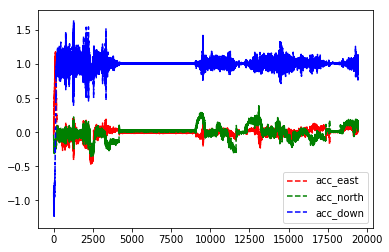

In [20]:
plt.show(to_plot_df.plot(style=['r--', 'g--', 'b--']))